<a href="https://colab.research.google.com/github/CarlosCordova2023/Red_DE_Clasificaci-n_PYTHON/blob/main/Red_DE_Clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds


In [4]:
datos, metadatos=tfds.load("mnist", as_supervised=True, with_info=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [5]:
metadatos

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/incomplete.E2QNMO_3.0.1/',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""

In [6]:
datos_entrenamiento=datos["train"]
datos_pruebas=datos["test"]

In [7]:
metadatos.features["label"].names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [8]:
nombres_clases=metadatos.features["label"].names

In [9]:
# Normalización
# 0-255 1 byte
# Transformar 0-255 0-1 (0=0, 255=1, 127=.5)

#Normalizar datos

def normalizar(imagenes, etiquetas):
  imagenes=tf.cast(imagenes, tf.float32)
  imagenes=imagenes/255
  return imagenes, etiquetas

datos_entrenamiento=datos_entrenamiento.map(normalizar)
datos_pruebas=datos_pruebas.map(normalizar)

#Agregar en caché

datos_entrenamiento=datos_entrenamiento.cache()
datos_pruebas=datos_pruebas.cache()

In [10]:
datos_entrenamiento.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

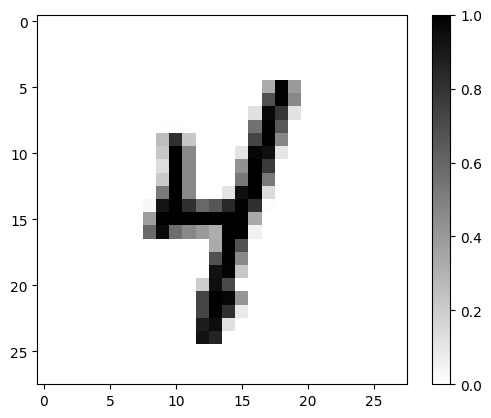

In [11]:
for imagen, etiquetas in datos_entrenamiento.take(1):
  break

import matplotlib.pyplot as plt

#Mostrar en pantalla
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.show()

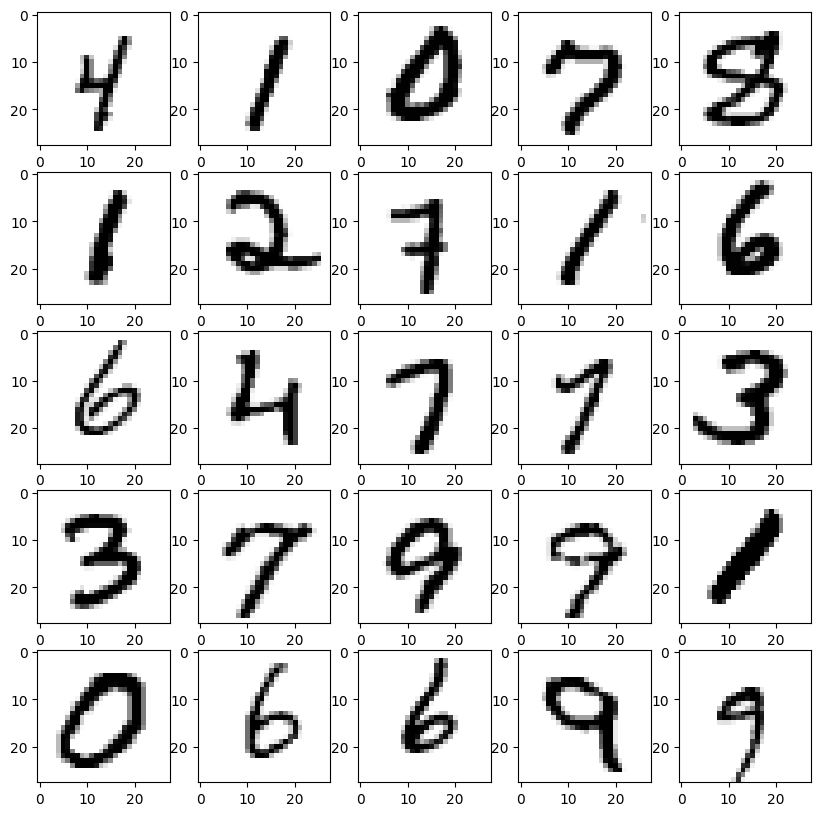

In [12]:
plt.figure(figsize=(10,10))

for i, (imagen, etiquetas) in enumerate(datos_entrenamiento.take(25)):
  #Mostrar en pantalla
  plt.subplot(5,5,i+1)
  plt.imshow(imagen, cmap=plt.cm.binary)

plt.show()

In [13]:
 modelo=tf.keras.Sequential([
     #782
     tf.keras.layers.Flatten(input_shape=(28,28,1)), #1=blanco y negro

     ### Capa Oculta
     tf.keras.layers.Dense(50,activation=tf.nn.relu),
     tf.keras.layers.Dense(50,activation=tf.nn.relu),

     #Capa salida
     tf.keras.layers.Dense(10,activation=tf.nn.softmax)

 ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
modelo.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [15]:
TAMANO_LOTE=32

datos_entrenamiento=datos_entrenamiento.repeat().shuffle(60000).batch(TAMANO_LOTE)
datos_pruebas=datos_pruebas.batch(TAMANO_LOTE)

In [16]:
import math
#Entrenar
entrenamiento=modelo.fit(
    datos_entrenamiento, epochs=10,
    steps_per_epoch=math.ceil(60000/TAMANO_LOTE)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8545 - loss: 0.5119
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9529 - loss: 0.1569
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9660 - loss: 0.1137
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9730 - loss: 0.0870
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9777 - loss: 0.0728
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9806 - loss: 0.0620
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9836 - loss: 0.0526
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9847 - loss: 0.0481
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9869 - loss: 0.0420
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9892 - loss: 0.0348
